In [136]:
#Step (2): Loading the dataset into your Python IDE "loading, reading and exploring the dataset"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')
raw_data = pd.read_csv('/content/drive/My Drive/HI1020/breast-cancer.csv')

X = raw_data.values[:, 2:32]
y = raw_data.values[:, 1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


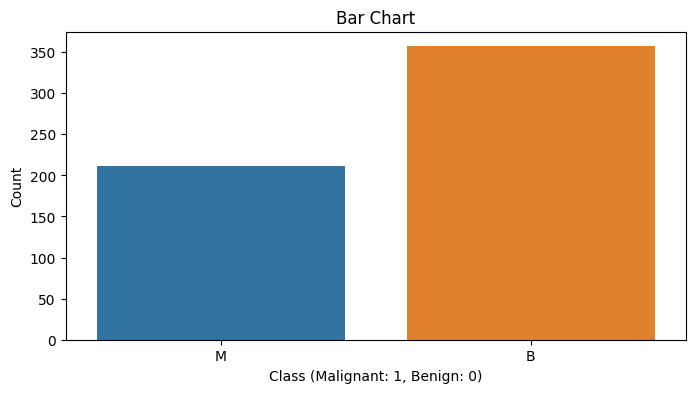

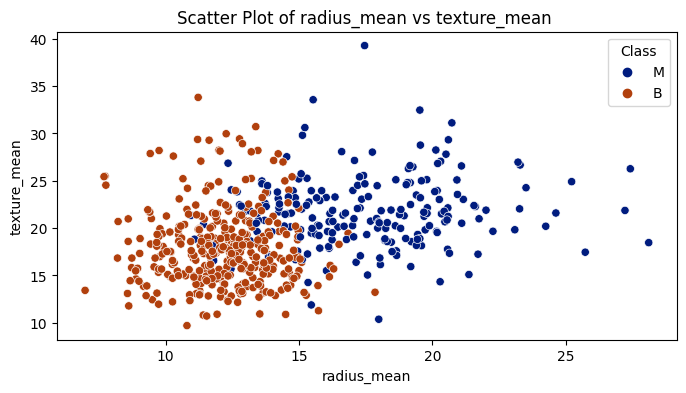

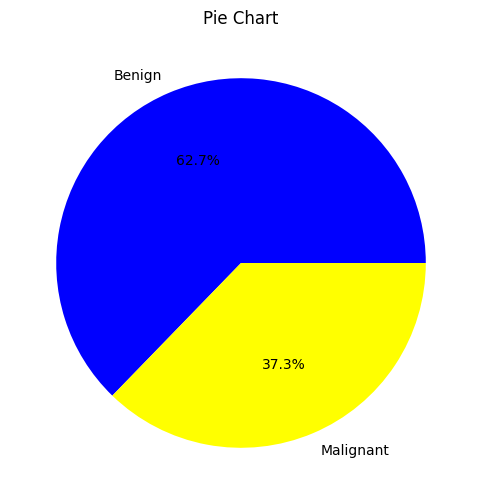

In [137]:
#Step 3: Data Visualization "draw three to four types of data visualization to better understand the dataset"

# Bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title('Bar Chart')
plt.xlabel('Class (Malignant: 1, Benign: 0)')
plt.ylabel('Count')
plt.show()

# Scatter plot
a = 0
b = 1
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X[:, a], y=X[:, b], hue=y, palette='dark')
plt.title(f'Scatter Plot of radius_mean vs texture_mean ')
plt.xlabel(f'radius_mean')
plt.ylabel(f'texture_mean')
plt.legend(title='Class')
plt.show()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(raw_data['diagnosis'].value_counts(), labels=['Benign', 'Malignant'], autopct='%1.1f%%', colors=['blue', 'yellow'])
plt.title('Pie Chart')
plt.show()

In [146]:
#Step (4) Make dataset avaiable for "Supervised" Machine Learning algorithms
y_numeric = np.where(y == 'B', 0, 1)

random_state = 42
print(f"Random state: {random_state}")

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, shuffle=True, random_state=random_state)


Random state: 42


In [147]:
#Step (5A)  Building and evaluating machine learning predictive models "build, train, and test two predictive models, using Decision Tree including Accuracy, Precision, and Recall"
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=random_state)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302

Confusion Matrix:
[[68  3]
 [ 3 40]]


In [148]:
#Step (5B) Building and evaluating machine learning predictive models "build, train, and test two predictive models, using Naïve Bayes including Accuracy, Precision, and Recall."
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9302

Confusion Matrix:
[[71  0]
 [ 3 40]]


In [149]:
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

accuracy_improvement = nb_accuracy - dt_accuracy
print(f"\nAccuracy Improvement (Naive Bayes - Decision Tree): {accuracy_improvement:.4f}")

Decision Tree Accuracy: 0.9474
Naive Bayes Accuracy: 0.9737

Accuracy Improvement (Naive Bayes - Decision Tree): 0.0263
